**Udemy 3-6. Moore's Law Notebook**

In [25]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Upload the data (NOT IN VIEDO)
from google.colab import files
uploaded = files.upload()

Saving moore.csv to moore.csv


In [23]:
!head /content/moore.csv

Intel 4004	2,300	1971	Intel	10,000 nm	12 mm²
Intel 8008	3,500	1972	Intel	10,000 nm	14 mm²
Intel 8080	4,500	1974	Intel	6,000 nm	20 mm²
Motorola 6800	4,100	1974	Motorola	6,000 nm	16 mm²
RCA 1802	5,000	1974	RCA	5,000 nm	27 mm²
TMS 1000	8,000	1974[7]	Texas Instruments	8,000 nm	
MOS Technology 6502	3,510[8]	1975	MOS Technology	8,000 nm	21 mm²
Intel 8085	6,500	1976	Intel	3,000 nm	20 mm²
Zilog Z80	8,500	1976	Zilog	4,000 nm	18 mm²
Intel 8086	29,000	1978	Intel	3,000 nm	33 mm²


In [11]:
#Prepare data (NOT IN VIEDO) - This file generates moore_data.csv

import re
# some numbers show up as 1,170,000,000 (commas)
# some numbers have references in square brackets after them
non_decimal = re.compile(r'[^\d]+')

X = []
Y = []

for line in open('moore.csv'):
    r = line.split('\t')

    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)


X = np.array(X)
Y = np.array(Y)

data = np.array([X,Y]).T
df = pd.DataFrame(data)
df.to_csv("moore_edited.csv", header=None, index=None)


In [12]:
# Load in the Data
data = pd.read_csv("moore_edited.csv", header=None).values
X = data[:,0].reshape(-1,1) #make it a 2D array of size N x D where D = 1
Y = data[:,1].reshape(-1,1)

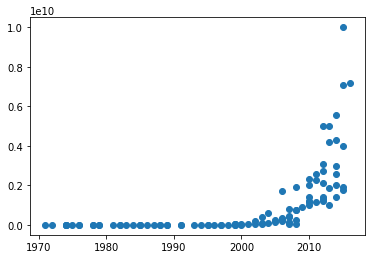

In [13]:
plt.scatter(X,Y)

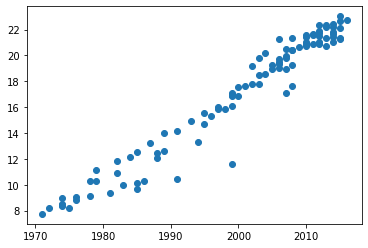

In [14]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X,Y)

In [15]:
# Standardize the data (Normalize)
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X-mx)/sx
Y = (Y-my)/sy

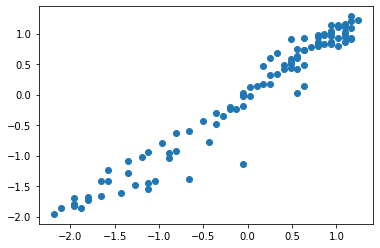

In [17]:
# Plot the normalized data (mean = 0,  std = 1)
plt.scatter(X,Y)

In [19]:
# Cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
# Create the linear model
model = nn.Linear(1,1)

In [23]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [26]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [27]:
# Train the model
n_epochs = 100
losses = []
for it in range(n_epochs):
  #zeros the parameter gradient
  optimizer.zero_grad()

  #forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  #record the loss
  losses.append(loss.item())

  #backward and optimize
  loss.backward()
  optimizer.step()
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 3.7962
Epoch 2/100, Loss: 3.6478
Epoch 3/100, Loss: 3.4051
Epoch 4/100, Loss: 3.1106
Epoch 5/100, Loss: 2.7952
Epoch 6/100, Loss: 2.4801
Epoch 7/100, Loss: 2.1789
Epoch 8/100, Loss: 1.8995
Epoch 9/100, Loss: 1.6461
Epoch 10/100, Loss: 1.4198
Epoch 11/100, Loss: 1.2204
Epoch 12/100, Loss: 1.0463
Epoch 13/100, Loss: 0.8956
Epoch 14/100, Loss: 0.7658
Epoch 15/100, Loss: 0.6546
Epoch 16/100, Loss: 0.5598
Epoch 17/100, Loss: 0.4792
Epoch 18/100, Loss: 0.4108
Epoch 19/100, Loss: 0.3529
Epoch 20/100, Loss: 0.3041
Epoch 21/100, Loss: 0.2629
Epoch 22/100, Loss: 0.2282
Epoch 23/100, Loss: 0.1990
Epoch 24/100, Loss: 0.1745
Epoch 25/100, Loss: 0.1539
Epoch 26/100, Loss: 0.1366
Epoch 27/100, Loss: 0.1221
Epoch 28/100, Loss: 0.1099
Epoch 29/100, Loss: 0.0997
Epoch 30/100, Loss: 0.0911
Epoch 31/100, Loss: 0.0840
Epoch 32/100, Loss: 0.0780
Epoch 33/100, Loss: 0.0729
Epoch 34/100, Loss: 0.0687
Epoch 35/100, Loss: 0.0652
Epoch 36/100, Loss: 0.0622
Epoch 37/100, Loss: 0.0598
Epoch 38/1

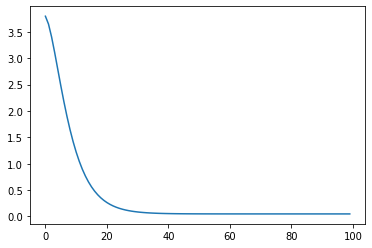

In [29]:
# Plot loss per iteration
plt.plot(losses)

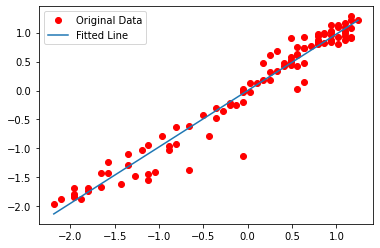

In [32]:
# Plot the graph
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label="Original Data")
plt.plot(X, predicted, label="Fitted Line")
plt.legend()
plt.show()